The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Define by

airplane[0]
automobile[1]
bird[2]
cat[3]
deer[4]
dog[5]
frog[6]
horse[7]
ship[8]
truck[9]

Import important library

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Load CIFAR10 dataset

In [3]:
(x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y, y_test = y.flatten(), y_test.flatten()
x = x / 255
x_test = x_test / 255

170498071/170498071 [==============================] - 2s 0us/step


Plot a training example

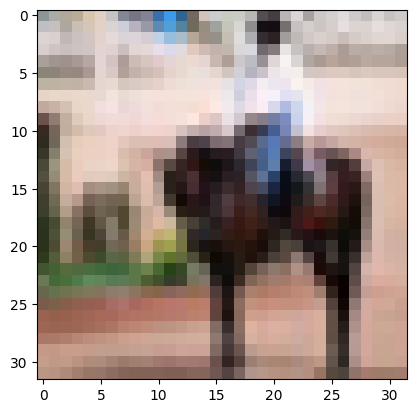

Class= 7


In [4]:
plt.imshow(x[11, :, :, :])
plt.show()
print(f"Class= {y[11]}")        # 7 = horse

Split the training set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=11)
X_test = x_test

print("Shape of the datasets")
print("Training set   =", X_train.shape, y_train.shape)
print("Validation set =", X_valid.shape, y_valid.shape)
print("Test set       =", X_test.shape, y_test.shape)

Shape of the datasets
Training set   = (40000, 32, 32, 3) (40000,)
Validation set = (10000, 32, 32, 3) (10000,)
Test set       = (10000, 32, 32, 3) (10000,)


Use one-hot encoding for y

In [6]:
Y_train = tf.one_hot(y_train, 10)
Y_valid = tf.one_hot(y_valid, 10)
Y_test = tf.one_hot(y_test, 10)

Create the model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size = (3,3),activation='relu',input_shape=(32,32,3), padding = 'same'),

    MaxPooling2D((2,2), padding = 'same'),
    Conv2D(filters=64, kernel_size = (3,3),activation='relu', padding = 'same'),
    MaxPooling2D((2,2), padding = 'same'),

    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])

hist1 = model.fit(X_train, Y_train, batch_size=4096, validation_data=(X_valid, Y_valid), epochs=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                2

Plot the training loss and validation loss

In [ ]:
N = len(hist1.history['loss'])
plt.plot(np.arange(N), hist1.history['loss'])
plt.plot(np.arange(N), hist1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'val_loss'], loc='upper right')
plt.show()

In [ ]:
res = model.evaluate(X_train, Y_train, verbose=0, batch_size=2048)
print(f"Training accuracy   = {res[1]:.4f}")
res = model.evaluate(X_valid, Y_valid, verbose=0, batch_size=2048)
print(f"Validation accuracy = {res[1]:.4f}")
res = model.evaluate(X_test, Y_test, verbose=0, batch_size=2048)
print(f"Test accuracy       = {res[1]:.4f}")